# Oliver Medgyesi

## Research question/interests

I am mainly interested in resarching the average salary of an individual, more specifically kelowna residents, and how affordable the current housing market is. I will also determine what factors are most significant in impacting the price of housing and how we can attempt to lower them. Columns 48, 52, and 54 from our dataset will be used to analyze my resarch question.

### My Primary Question:

1. **How does the affordability of housing in Canada vary relative to the average monthly net salary, and what factors such as population density, location and demand may be driving or affecting these discrepancies. Also, how does Kelowna compare in terms of housing prices compared to other cities in Canada.**

> To answer this question, I am going to analyze the data on the average monthly net saraly and the cost of apartments in various canadian locations. I will then calculate the average cost of housing as a percentage of the average salary in each location. I will also focus on the considerable changes in the affordability of housing in Kelowna. I will also explore the potential factors that possibly contribute to these differences.
---
### Supporting Questions Regarding Housing Affordability and the Average Salary:


2. **Is there a correlation between the price of housing and the cost of living and is it impacted by outside factors such as groceries, transportation, and gasoline prices?**
 
 > To answer this question, we will need to find if there is a correlation between the price of housing and the cost of living. We can use regression to examine the relationships between housing prcies and the multiple factors listed. By anaylyzing this way, we will be able to determine if there is any relationship bonded from these categories. If so, we will determine which factor has the greatest impact on the price of housing. 

3. **What percentage of the average salary in Kelowna is required to afford the current housing prices and how has this changed overtime?**

 > I am going to focus on examining the trends over time to determine if there is any correlation between the changes in kelowna residents average salary and the changes in housing affordability. By examining this data over different intervals of time, I will find if there are any significant changes or fluxuations in the housing market.




---


### Data dictionary
| Column | Description |
| - | - |
| city | Name of the city |
| country | Name of the country|
| x1 | Meal, Inexpensive Restaurant (USD) |
| x2 | Meal for 2 People, Mid-range Restaurant, Three-course (USD) |
| x3 | McMeal at Mcdonalds (or Equivalent Combo Meal) (USD) |
| x4 | Domestic Beer (0.5 litre draught, in restaurants) (USD) |
| x5 | Imported Beer (0.33 litre bottle, in restaurants) (USD) |
| x6 | Cappuccino (regular, in restaurants) (USD) |
| x7 | Coke/Pepsi (0.33 litre bottle, in restaurants) (USD) |
| x8 | Water (0.33 litre bottle, in restaurants) (USD) |
| x9 | Milk (regular), (1 litre) (USD) |
| x10 | Loaf of Fresh White Bread (500 g) (USD) |
| x11 | Rice (white), (1kg) (USD) |
| x12 | Eggs (regular) (12) (USD) |
| x13 | Local Cheese (1kg) (USD) |
| x14 | Chicken Fillets (1kg) (USD) |
| x15 | Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD) |
| x16 | Apples (1kg) (USD) |
| x17 | Bananas (1kg) (USD) |
| x18 | Oranges (1kg) (USD) |
| x19 | Tomatoes (1kg) (USD) |
| x20 | Potatoes (1kg) (USD) |
| x21 | Onions (1kg) (USD) |
| x22 | Lettuce (1 head) (USD) |
| x23 | Water (1.5 litre bottle, at the market) (USD) |
| x24 | Bottle of Wine (Mid-Range, at the market) (USD) |
| x25 | Domestic Beer (0.5 litre bottle, at the market) (USD) |
| x26 | Imported Beer (0.33 litre bottle, at the market) (USD) |
| x27 | Cigarettes 20 Pack (Marlboro) (USD) |
| x28 | One-way Ticket (Local Transport) (USD) |
| x29 | Monthly Pass (Regular Price) (USD) |
| x30 | Taxi Start (Normal Tariff) (USD) |
| x31 | Taxi 1km (Normal Tariff) (USD) |
| x32 | Taxi 1hour Waiting (Normal Tariff) (USD) |
| x33 | Gasoline (1 litre) (USD) |
| x34 | Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD) |
| x35 | Toyota Corlla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD) |
| x36 | Basic (Electricity, Heating, Cooling, Water, Garbage) for 85 m<sup>2</sup> Apartment (USD) |
| x37 | 1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD) |
| x38 | Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD) |
| x39 | Fitness Club, Monthly Fee for 1 Adult (USD) |
| x40 | Tennis Court Rent (1 Hour on Weekend) (USD) |
| x41 | Cinema, International Release, 1 Seat (USD) |
| x42 | Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD) |
| x43 | International Primary School, Yearly for 1 Child (USD) |
| x44 | 1 Pair of Jeans (Levis 501 Or Similar) (USD) |
| x45 | 1 Summer Dress in a Chain Store (Zara, H&M, or similar) (USD) |
| x46 | 1 Pair of Nike Running Shoes (Mid-Range) (USD) |
| x47 | 1 Pair of Men Leather Business Shoes (USD) |
| x48 | Apartment (1 bedroom) in City Centre (USD) |
| x49 | Apartment (1 bedroom) Outside of Centre (USD) |
| x50 | Apartment (3 bedrooms) in City Centre (USD) |
| x51 | Apartment (3 bedrooms) Outside of Centre (USD) |
| x52 | Price per Square Metre to Buy Apartment in City Centre (USD) |
| x53 | Price per Square Metre to Buy Apartment Outside of Centre (USD) |
| x54 | Average Monthly Net Salary (After Tax) (USD) |
| x55 | Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate
| data_quality | 0 if Numbeo considers that more contributors are needed to increase data quality, else 1 |

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
cost_living_df = pd.read_csv("../data/raw/cost-of-living_v2.csv")
cost_living_df.head()

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [ ]:
cost_living_df[cost_living_df['city']=='Kelowna']

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
2110,Kelowna,Canada,11.12,61.14,8.89,5.19,5.19,3.71,1.76,1.67,...,91.25,1301.03,1079.54,2206.98,1804.14,3875.6,2910.15,3119.7,6.01,1


In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

#base
sns.set_theme(style="ticks", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)
sns.set(rc={'figure.figsize':(5,8)})

In [ ]:
#load data
df = pd.read_csv("../data/raw/cost-of-living_v2.csv")
df.head()

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [ ]:
kelowna_df = cost_living_df[cost_living_df['city']=='Kelowna']

# Exploring the Dataset

Here is a list of some ways to explore the dataset:

1. We can use the head() function to get the first few rows of our dataset. It is hard to interperate these column names, so lets rename all the columns to their corresponding values.

2. The info() method can be used to gather a summary of the dataset which includes, columns, data types, and NaN values.

3. We can use the shape function to get the size of the dataset.

4. We can use the describe function to describe to get a summary of each individual column in the dataset.

5. Lets calculate the total number of NaN Values inside of the dataset, then create a column that calculates each specific amount of NaN values. I also want to see which columns contain more than 3 NaN values. This is because anything with more than 3 is considered to be bad quality data and cannot be included in our research. 

6. We can visualize the greatest to least amount of NaN values inside of the dataset and then we can remove them.

In [ ]:

df.head()

columns = ["city", "country", "x1 (meal cheap)", "x2 (meal mid-range)", "x3 (McMeal)", "x4 (beer domestic)", 
           "x5 (beer imported)","x6 (cappuccino)", "x7 (Coke/Pepsi)","x8 (water resto)", "x9 (milk)", "x10 (bread)", "x11 (rice)",   
            "x12 (eggs)", "x13 (cheese local)", "x14 (chicken fillets)", "x15 (beef round)", "x16 (apples)", "x17 (bananas)", 
            "x18 (oranges)", "x19 (tomatoes)", "x20 (potatoes)", "x21 (onions)", "x22 (lettuce)", "x23 (water 1.5L)", "x24 (wine mid-range)",
            "x25 (beer domestic 0.5L)", "x26 (beer imported 0.33L)", "x27 (cigarettes)", "x28 (One-Way ticket transit)", "x29 (monthly pass transit)", "x30 (taxi start)",
            "x31 (taxi 1km)", "x32 (Taxi 1hr wait)", "x33 (Gas 1L)","x34 (Volkswagen Golf)", "x35 (Toyota Corolla Sedan)", "x36 (basic utilities)", 
            "x37 (mobile tariff 1min)", "x38 (internet)", "x39 (fitness club)", "x40 (tennis court rent)", "x41 (cinema ticket)", "x42 (preschool)",
            "x43 (primary school)", "x44 (jeans)", "x45 (summer dress)", "x46 (Nike running shoes)", "x47 (men's business shoes)", 
            "x48 (apartment 1BR city center)", "x49 (apartment 1BR outside center)", "x50 (apartment 3BR city center)", "x51 (apartment 3BR outside center)",
            "x52 (price per sqm city center)",  "x53 (price per sqm outside center)", "x54 (average monthly net salary)", "x55 (mortgage interest rate)",
            "data quality"]

df.columns = columns

In [ ]:
df = df[['city', 'country', 
    #'x1', 'x2', 
    'x3 (McMeal)', #McDonalds
    #'x4', 'x5', 'x6', 'x7', 'x8',
    'x9 (milk)','x10 (bread)', 'x11 (rice)', 'x12 (eggs)', 'x13 (cheese local)',
    'x14 (chicken fillets)', 'x15 (beef round)', 'x16 (apples)',
    'x17 (bananas)', 'x18 (oranges)', 'x19 (tomatoes)', 'x20 (potatoes)',
    'x21 (onions)', 'x22 (lettuce)', 'x23 (water 1.5L)', #Groceries
    #'x24', 'x25', 'x26', 'x27', 
    'x28 (One-Way ticket transit)', 'x29 (monthly pass transit)',
    'x30 (taxi start)', 'x31 (taxi 1km)', 'x32 (Taxi 1hr wait)',
    'x33 (Gas 1L)', 
    "x34 (Volkswagen Golf)", "x35 (Toyota Corolla Sedan)",  # Transport
    'x36 (basic utilities)', #Basic
    #'x37','x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 
    'x48 (apartment 1BR city center)',
    'x49 (apartment 1BR outside center)', 'x50 (apartment 3BR city center)',
    'x51 (apartment 3BR outside center)', 'x52 (price per sqm city center)',
    'x53 (price per sqm outside center)',#Shelter
    'x54 (average monthly net salary)', #Monthly net salary (after tax)
    'x55 (mortgage interest rate)', 
    'data quality']].copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city                                4956 non-null   object 
 1   country                             4956 non-null   object 
 2   x3 (McMeal)                         4622 non-null   float64
 3   x9 (milk)                           4578 non-null   float64
 4   x10 (bread)                         4543 non-null   float64
 5   x11 (rice)                          4613 non-null   float64
 6   x12 (eggs)                          4449 non-null   float64
 7   x13 (cheese local)                  4478 non-null   float64
 8   x14 (chicken fillets)               4398 non-null   float64
 9   x15 (beef round)                    4390 non-null   float64
 10  x16 (apples)                        4584 non-null   float64
 11  x17 (bananas)                       4575 no

In [ ]:
df.shape

(4956, 36)

In [ ]:
df.describe

<bound method NDFrame.describe of                     city      country  x3 (McMeal)  x9 (milk)  x10 (bread)  \
0                  Seoul  South Korea         6.15       2.20         2.85   
1               Shanghai        China         5.69       2.74         2.61   
2              Guangzhou        China         4.98       1.91         1.63   
3                 Mumbai        India         3.68       0.75         0.50   
4                  Delhi        India         4.30       0.73         0.50   
...                  ...          ...          ...        ...          ...   
4951        Peterborough    Australia          NaN        NaN          NaN   
4952          Georgetown    Australia          NaN        NaN          NaN   
4953  Ixtapa Zihuatanejo       Mexico        12.89       1.80         0.77   
4954             Iqaluit       Canada        13.71       2.53         2.95   
4955              Neiafu        Tonga        10.64       1.57         0.85   

      x11 (rice)  x12 (eggs) 

In [ ]:
total_nans = df.isna().sum().sum()
print(f'Total number of NaN values: {total_nans}')

df['Num_NaN'] = df.isnull().sum(axis=1)
df


Total number of NaN values: 29845


,city,country,x3 (McMeal),x9 (milk),x10 (bread),x11 (rice),x12 (eggs),x13 (cheese local),x14 (chicken fillets),x15 (beef round),...,x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate),data quality,Num_NaN
0,Seoul,South Korea,6.15,2.20,2.85,3.53,4.04,11.54,10.58,41.61,...,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1,0
1,Shanghai,China,5.69,2.74,2.61,1.22,2.22,18.35,4.86,13.12,...,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1,0
2,Guangzhou,China,4.98,1.91,1.63,1.03,1.71,9.00,3.77,11.75,...,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1,0
3,Mumbai,India,3.68,0.75,0.50,0.83,0.95,5.88,3.69,5.95,...,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1,0
4,Delhi,India,4.30,0.73,0.50,0.85,1.02,4.36,3.81,5.71,...,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,33
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,33
4953,Ixtapa Zihuatanejo,Mexico,12.89,1.80,0.77,NaN,1.24,NaN,NaN,NaN,...,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0,19
4954,Iqaluit,Canada,13.71,2.53,2.95,6.86,3.71,8.80,11.88,11.44,...,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0,11


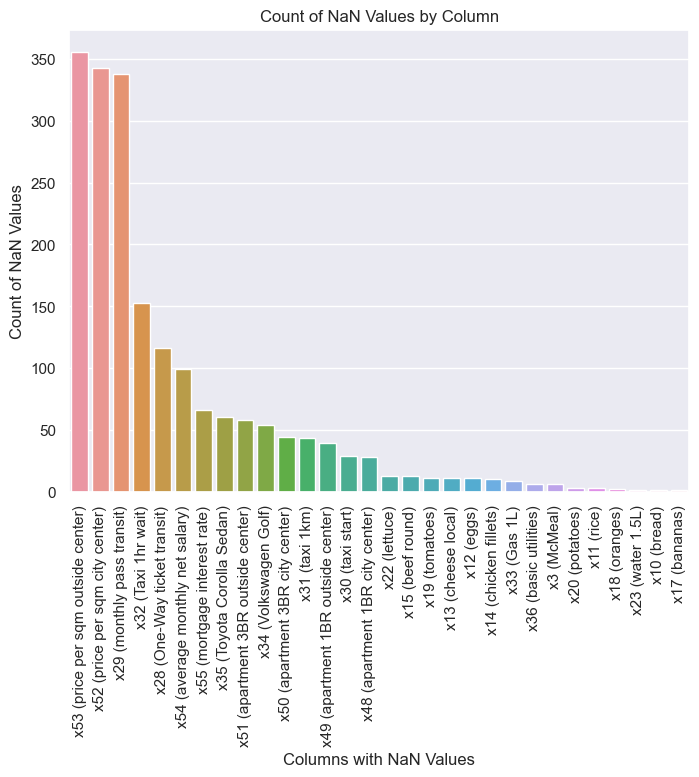

In [ ]:
mask = df.isna().sum(axis=1) <= 3
cost_living_clean = df[mask]
nan_cols = cost_living_clean.isna().any()
nan_cols = nan_cols[nan_cols].index.tolist()

nan_counts = cost_living_clean[nan_cols].isna().sum().sort_values(ascending=False)

sns.set_palette("pastel")

nan_counts = cost_living_clean.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
nan_counts = nan_counts.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns with NaN Values")
plt.ylabel("Count of NaN Values")
plt.title("Count of NaN Values by Column")
plt.show()

# Cleaning the Dataset

Here are some ways we can clean our dataset:

1. First we can handle any dupliactes that appear in our dataset by using the drop_duplicates() method.

2. We can use the isnull() method to identify any null or NaN values inside of the dataset. Then, we can use the dropna() method to get rid of them.,

3. We can determine if there are any inconsistencies inside of our dataset. If there are any inconsistencies, then we will remove them from the dataset.

4. We can also remove any outliers inside of the specific columns we are going to use. For example we can remove any outliers inside of the "Avery Monthly New Salary" section of the Kelowna column. Removing outliers from this section of data is important because it something that I will be using to create coorelations with other parts of our dataset.

5. Drop all bad quality data from the dataset.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull()
df.dropna()

,city,country,x3 (McMeal),x9 (milk),x10 (bread),x11 (rice),x12 (eggs),x13 (cheese local),x14 (chicken fillets),x15 (beef round),...,x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate),data quality,Num_NaN
0,Seoul,South Korea,6.15,2.20,2.85,3.53,4.04,11.54,10.58,41.61,...,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1,0
1,Shanghai,China,5.69,2.74,2.61,1.22,2.22,18.35,4.86,13.12,...,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1,0
2,Guangzhou,China,4.98,1.91,1.63,1.03,1.71,9.00,3.77,11.75,...,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1,0
3,Mumbai,India,3.68,0.75,0.50,0.83,0.95,5.88,3.69,5.95,...,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1,0
4,Delhi,India,4.30,0.73,0.50,0.85,1.02,4.36,3.81,5.71,...,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Murovani Kurylivtsi,Ukraine,2.69,0.75,0.56,0.88,0.98,5.16,3.15,5.41,...,108.79,95.19,163.18,122.38,237.97,231.17,365.79,13.05,0,0
4941,Mackay,Australia,8.83,1.04,2.15,1.70,3.17,11.44,8.15,12.91,...,736.21,679.58,1359.16,1087.33,11213.06,10091.76,3737.69,5.80,0,0
4945,Tirupati,India,4.30,0.58,0.57,0.64,0.83,4.91,2.58,6.61,...,82.90,61.41,184.23,128.96,661.00,396.60,614.09,7.97,0,0
4947,Rockhampton,Australia,8.15,1.04,1.26,1.56,3.17,6.12,7.25,11.33,...,781.58,594.63,951.41,906.11,5097.49,4019.31,3481.06,5.80,0,0


In [ ]:
inconsistent_data = cost_living_df.apply(lambda x: len(x.unique()) == 1)
cost_living_df = cost_living_df.loc[:, ~inconsistent_data]
inconsistent_data

city            False
country         False
x1              False
x2              False
x3              False
x4              False
x5              False
x6              False
x7              False
x8              False
x9              False
x10             False
x11             False
x12             False
x13             False
x14             False
x15             False
x16             False
x17             False
x18             False
x19             False
x20             False
x21             False
x22             False
x23             False
x24             False
x25             False
x26             False
x27             False
x28             False
x29             False
x30             False
x31             False
x32             False
x33             False
x34             False
x35             False
x36             False
x37             False
x38             False
x39             False
x40             False
x41             False
x42             False
x43             False
x44       

In [ ]:
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df = df[~((df< (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    return df


In [ ]:
df.drop(df[df['data quality'] == 0].index, inplace=True)
df.isna().sum().sort_values(ascending=False).head(10)
df.shape

(923, 37)

# Visualizing some of our Data

First we can create a heatmap to see which factors have a significant correlation.



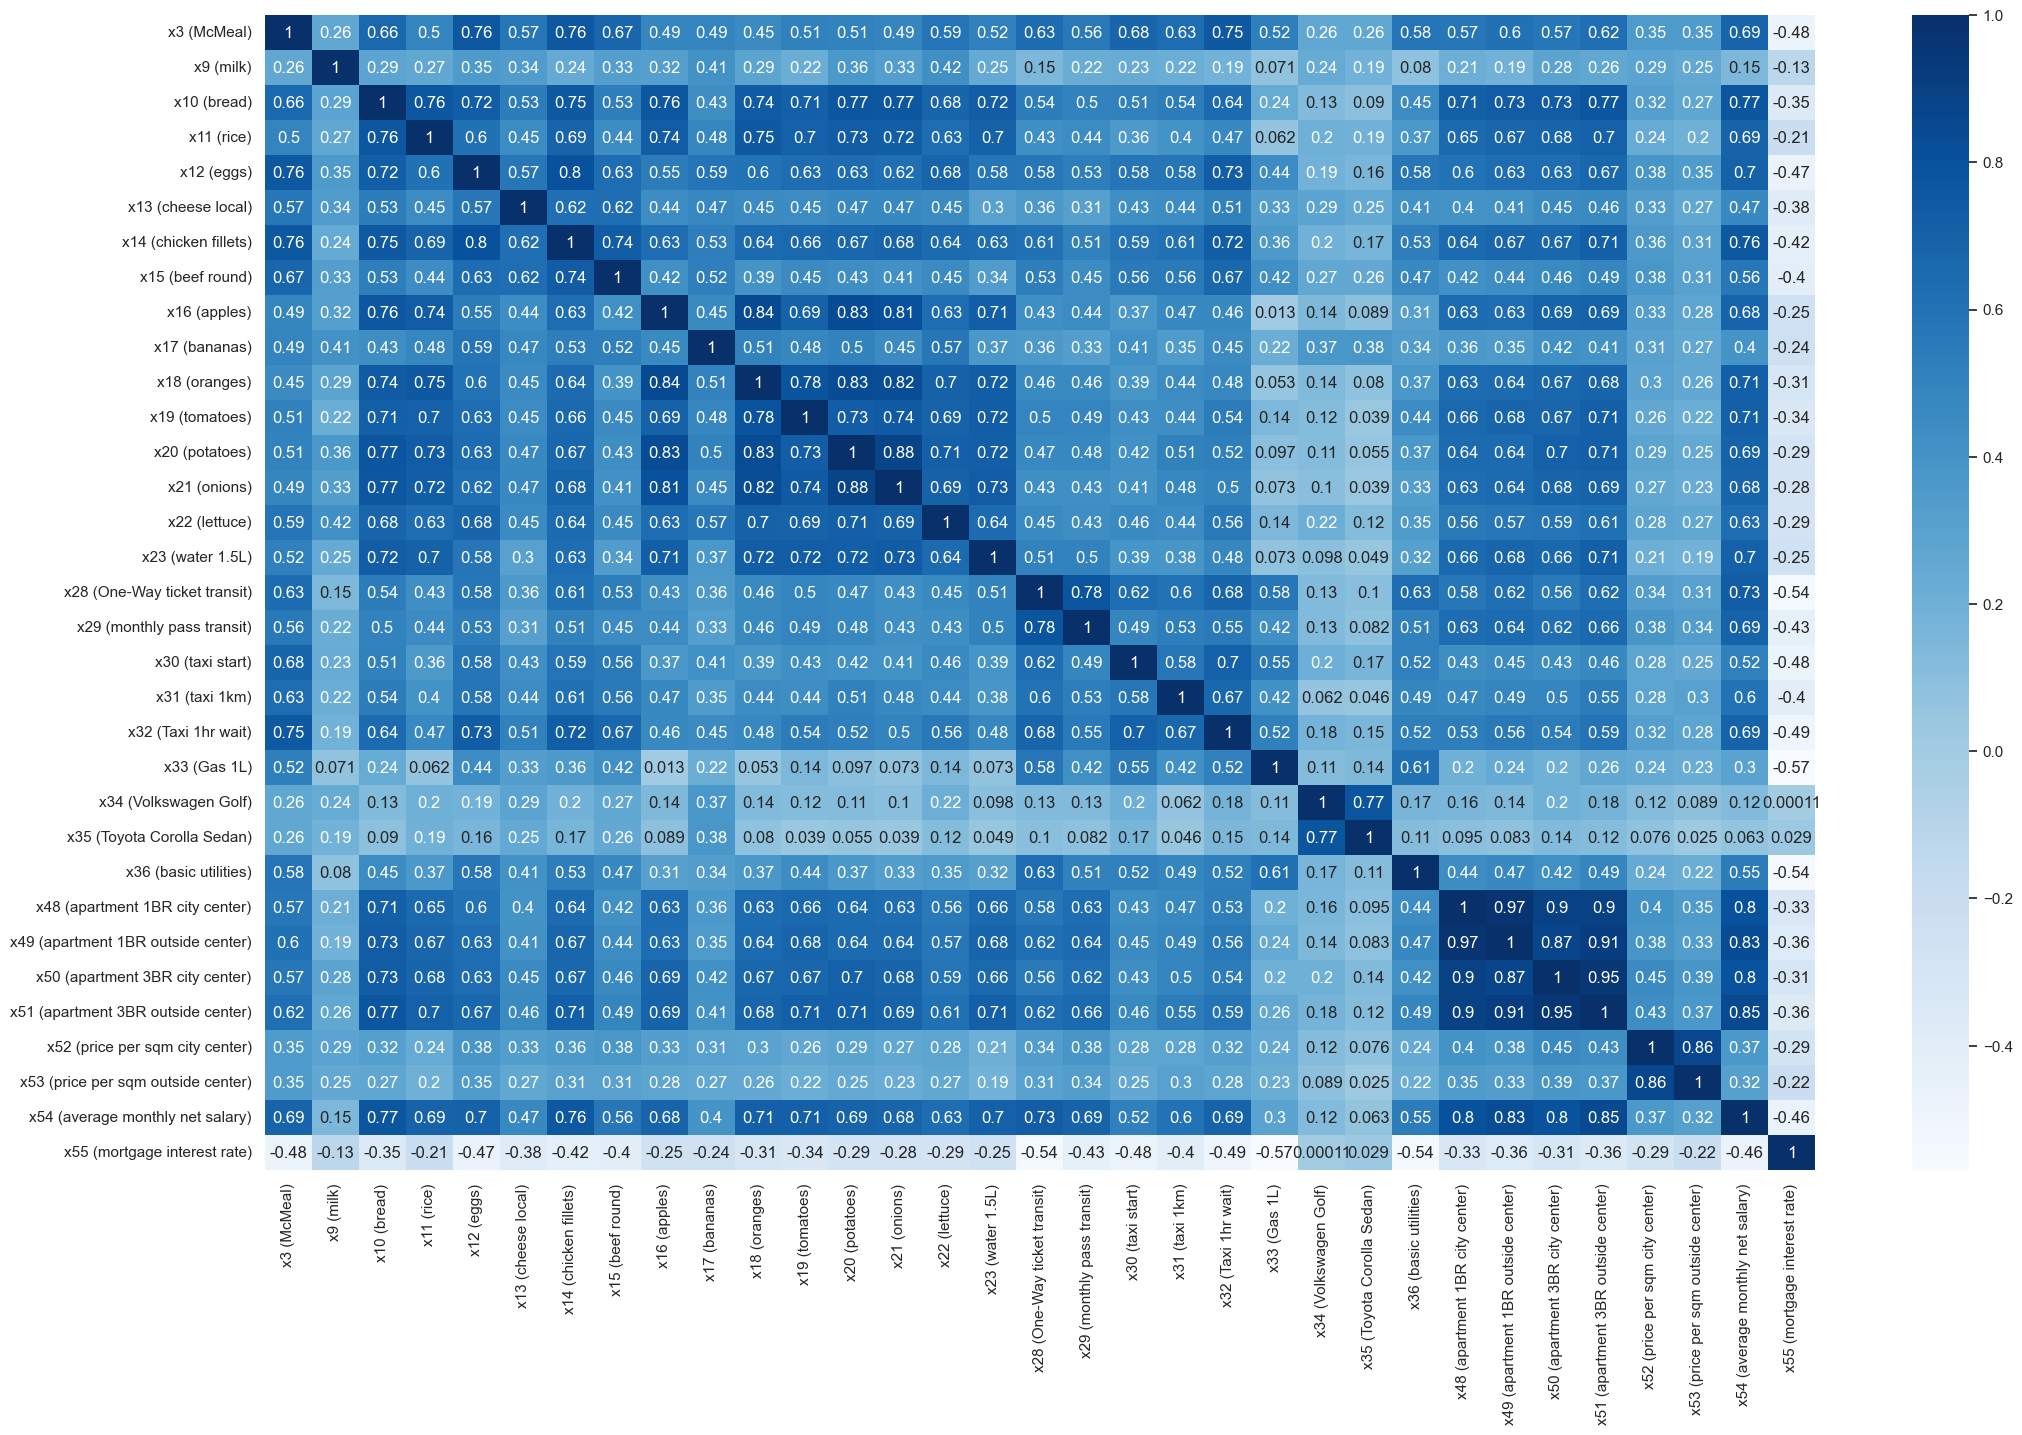

In [ ]:
plt.figure(figsize=(25,15))
df_filtered = df.drop(columns=["data quality","Num_NaN"])
corr = df_filtered.corr(numeric_only = True,)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues')
plt.show()

Now that we can visually see all the possible correlations, lets investigate some possible positive and negative correlations. 

Strongest Correlation: Apartment 1BR Outside City Center and Apartment 1BR Inside City Center (0.97)

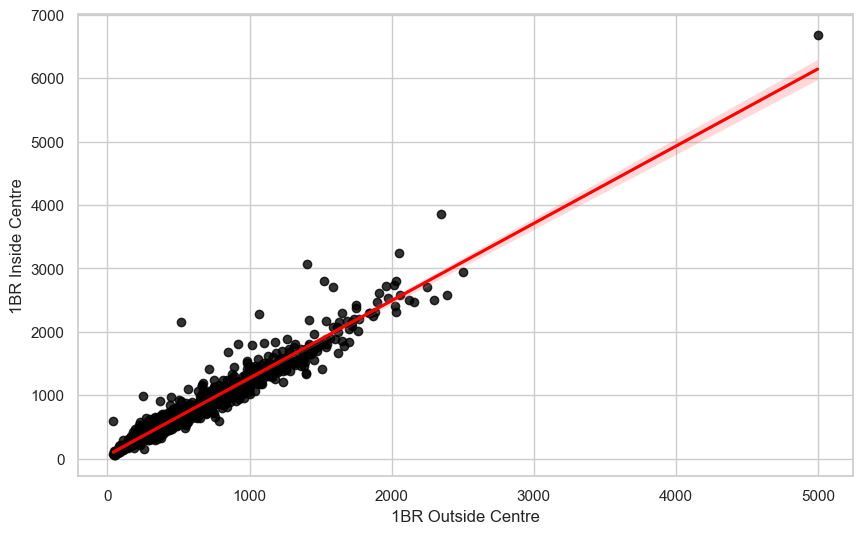

In [ ]:
sns.set_style("whitegrid")

x = df["x49 (apartment 1BR outside center)"]
y = df["x48 (apartment 1BR city center)"]

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, color="black", line_kws={"color": "red"})
plt.xlabel("1BR Outside Centre")
plt.ylabel("1BR Inside Centre")

plt.show()

As we can see there is a 0.97 correlation between the two. The reason for this may be that there is a strong demand for housing outside of the centre and inside the city. Another reason for this correlation would be the location. City centers tend to have ammenties making them more expensive which would create a correlation.

In [ ]:
sns.set_style("whitegrid")

x = cost_living_df["x32 (Taxi 1hr wait)"]
y = cost_living_df["x3 (McMeal)"]

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, color="black", line_kws={"color": "red"})
plt.xlabel("Taxi 1hr Wait")
plt.ylabel("McMeal")

plt.show()

KeyError: 'x32 (Taxi 1hr wait)'

Another strong correlation is between a taxi wait time and a McMeal. This correlation could be cause by indivuals who tend to purchase fast-food while waiting for a taxi.

# Adjusting to Canada

In this section i will be creating a "Canada" dataframe that contains all of the cities in Canada. This way it is a lot easier to compare the housing prices in Kelowna to other cities. Now we need to see which cities contain more than 3 NaN values in order to filter our data.

In [ ]:
canada_df = df[df["country"] == "Canada"]

canada_housing_df = canada_df[['city', "x48 (apartment 1BR city center)", "x49 (apartment 1BR outside center)", "x50 (apartment 3BR city center)", "x51 (apartment 3BR outside center)",
            "x52 (price per sqm city center)",  "x53 (price per sqm outside center)", "x54 (average monthly net salary)", "x55 (mortgage interest rate)",]]

canada_housing_df

,city,x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate)
102,Toronto,1728.50,1426.71,2733.40,2302.11,9834.67,7249.17,3249.79,5.24
151,Montreal,1045.58,800.16,1846.59,1342.69,6069.66,3487.84,2823.94,5.41
209,Vancouver,1799.96,1502.80,3373.09,2341.43,9983.22,7902.75,3474.89,4.46
355,Calgary,1121.71,903.12,1976.24,1504.96,3328.49,2651.05,3807.94,4.58
410,Edmonton,906.92,745.74,1535.36,1153.16,2200.36,1841.51,3403.02,4.82
448,Ottawa,1271.64,1000.55,2040.48,1612.00,4884.05,3616.54,3319.71,5.33
463,Winnipeg,817.87,843.69,1349.06,1295.92,3038.71,2649.61,2145.63,4.50
473,Quebec City,721.93,588.10,1242.85,929.81,7736.10,1752.82,3012.07,5.06
486,Kitchener,1289.29,1159.47,1780.81,1650.29,5966.09,5661.11,3369.02,6.30
488,Halifax,1217.45,973.06,1919.75,1504.86,3764.62,2099.92,3072.15,4.63


In [ ]:
city_counts = canada_housing_df.groupby("city").apply(lambda x: x.isna().sum().sum())
bad_cities = city_counts[city_counts >= 3].index.tolist()

canada_housing_df = canada_housing_df[~canada_housing_df["city"].isin(bad_cities)]
canada_housing_df.reset_index(drop=True)

canada_housing_df


,city,x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate)
0,Toronto,1728.50,1426.71,2733.40,2302.11,9834.67,7249.17,3249.79,5.24
1,Montreal,1045.58,800.16,1846.59,1342.69,6069.66,3487.84,2823.94,5.41
2,Vancouver,1799.96,1502.80,3373.09,2341.43,9983.22,7902.75,3474.89,4.46
3,Calgary,1121.71,903.12,1976.24,1504.96,3328.49,2651.05,3807.94,4.58
4,Edmonton,906.92,745.74,1535.36,1153.16,2200.36,1841.51,3403.02,4.82
5,Ottawa,1271.64,1000.55,2040.48,1612.00,4884.05,3616.54,3319.71,5.33
6,Winnipeg,817.87,843.69,1349.06,1295.92,3038.71,2649.61,2145.63,4.50
7,Quebec City,721.93,588.10,1242.85,929.81,7736.10,1752.82,3012.07,5.06
8,Kitchener,1289.29,1159.47,1780.81,1650.29,5966.09,5661.11,3369.02,6.30
9,Halifax,1217.45,973.06,1919.75,1504.86,3764.62,2099.92,3072.15,4.63


Lets compare the price per square meter outside the city of Kelowna to Vancouver, Calgary, and Winnpeg.

In [ ]:
cities = ["Kelowna", "Vancouver", "Calgary", "Winnipeg"]
df_cities = canada_housing_df[canada_housing_df['city'].isin(cities)]
df_kelowna = df_cities[df_cities['city'] == 'Kelowna']
df_vancouver = df_cities[df_cities['city'] == 'Vancouver']
df_winnipeg = df_cities[df_cities['city'] == 'Winnipeg']
df_calgary = df_cities[df_cities['city'] == 'Calgary']


,city,x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate)
3,Calgary,1121.71,903.12,1976.24,1504.96,3328.49,2651.05,3807.94,4.58


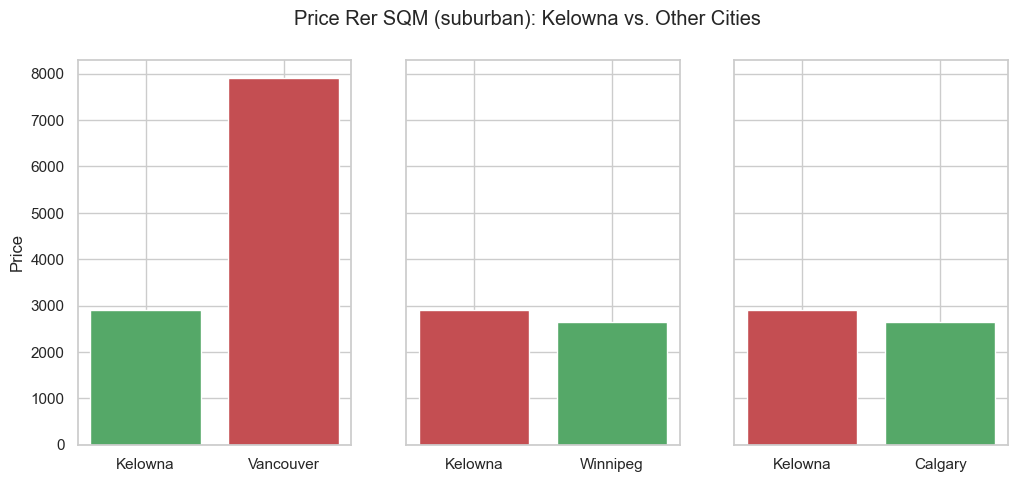

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

# Setting Colors
kelowna_vancouver_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_vancouver['x53 (price per sqm outside center)'].values[0] else 'r'
kelowna_winnipeg_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_winnipeg['x53 (price per sqm outside center)'].values[0] else 'r'
kelowna_calgary_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_calgary['x53 (price per sqm outside center)'].values[0] else 'r'

# Kelowna vs Vancouver
axs[0].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_vancouver['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_vancouver_color, 'r'])
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Kelowna', 'Vancouver'])
axs[0].set_ylabel('Price')

# Kelowna vs Winnipeg
axs[1].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_winnipeg['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_winnipeg_color, 'g'])
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Kelowna', 'Winnipeg'])

# Kelowna vs Calgary
axs[2].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_calgary['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_calgary_color, 'g'])
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Kelowna', 'Calgary'])

plt.suptitle('Price Rer SQM (suburban): Kelowna vs. Other Cities')
plt.show()

# Extra statistics

First, I am going to create a new dataframe that contains the Mean, Median, STD, Min, and Max values for all of Canada.

In [ ]:

mean = canada_housing_df.mean()
median = canada_housing_df.median()
std = canada_housing_df.std()
minimum = canada_housing_df.min()
maximum = canada_housing_df.max()

stats_df = pd.concat([mean, median, std, minimum, maximum], axis=1)
stats_df.columns = ['Mean', 'Median', 'Std', 'Min', 'Max']

stats_df

C:\Users\Omedg\AppData\Local\Temp\ipykernel_29948\65206765.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = canada_housing_df.mean()
C:\Users\Omedg\AppData\Local\Temp\ipykernel_29948\65206765.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = canada_housing_df.median()
C:\Users\Omedg\AppData\Local\Temp\ipykernel_29948\65206765.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is depr

,Mean,Median,Std,Min,Max
x48 (apartment 1BR city center),1157.127024,1164.740,348.297457,415.04,2445.79
x49 (apartment 1BR outside center),1049.099167,1003.750,337.388715,426.16,2297.56
x50 (apartment 3BR city center),1978.277619,1862.135,709.785781,713.36,4211.95
x51 (apartment 3BR outside center),1727.396190,1677.170,523.377171,629.98,3025.87
x52 (price per sqm city center),5173.407458,4651.100,2647.034849,1412.05,11966.5
x53 (price per sqm outside center),3970.123684,3416.950,2175.260574,555.86,9573.2
x54 (average monthly net salary),3023.122105,3093.005,791.794517,1334.07,5188.05
x55 (mortgage interest rate),5.553810,5.440,1.287025,2.0,8.75
city,NaN,NaN,NaN,Abbotsford,Yellowknife


From creating this new dataframe, we can see that Abbotsford has some of the lowest statistics, while Yellowknife is on the opposite end. Due to Yellowstone being so remote, the cost of living and housing is more expensive than in other places. This also indicates why the average monthly net salary is much more as necessities are more expensive due to their scarcity.

Lets visualize the Min vs Max values of "stats_df" which contains the most expensive housing vs the least expensive.

<Axes: >

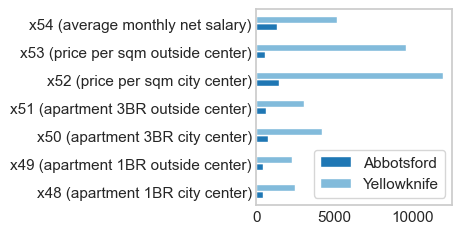

In [ ]:
min_df = stats_df['Min']
max_df = stats_df['Max']
new_labels = {'Min': 'Abbotsford', 'Max': 'Yellowknife'}

minmax_df = pd.DataFrame(stats_df,columns = ['Min','Max'], index = ['x48 (apartment 1BR city center)','x49 (apartment 1BR outside center)','x50 (apartment 3BR city center)','x51 (apartment 3BR outside center)','x52 (price per sqm city center)','x53 (price per sqm outside center)','x54 (average monthly net salary)'])
minmax_df = minmax_df.rename(columns=new_labels)
minmax_df.plot.barh()